# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Rifqi Ambari
- **Email:** rifqi4mbari@gmail.com
- **ID Dicoding:** rifqi_4mbari

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah penyewaan sepeda pada tahun 2011 dan 2012
- Bagaimana pengaruh musim terhadap pengguna bike sharing?
- Bagaimana perbandingan antara pelanggan registered dan casual?

## Import Semua Packages/Library yang Digunakan

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

- Read Data day.csv

In [16]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Read Data hour.csv

In [17]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

- Check Data Type

In [18]:
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

- Check Missing Value for hour_df

In [19]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Check Missing Value for hour_df

In [20]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

-- There's no missing value

In [21]:
# Check duplicates
print("Total duplicates: ", hour_df.duplicated().sum())
print("Total duplicates: ", day_df.duplicated().sum())

Total duplicates:  0
Total duplicates:  0


-- There's no duplicate

- Check statistics parameters

In [22]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [23]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

- Here we want to convert/typecasting and replace name to make it easy to understand

-- Rename the columns

In [24]:
day_df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [25]:
hour_df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [26]:
day_df.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [27]:
hour_df.head()

,rec_id,datetime,season,year,month,hr,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- Typecasting the datetime & numerical attributes to category

In [28]:
columns = ['season' , 'year' , 'month' , 'holiday' , 'weekday' , 'workingday' , 'weather_condition']

for column in columns:
  day_df[column] = day_df[column].astype("category")
  hour_df[column] = day_df[column].astype("category")

In [29]:
day_df['datetime'] = pd.to_datetime(day_df['datetime'])
hour_df['datetime'] = pd.to_datetime(hour_df['datetime'])

In [30]:
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    category      
 4   month              731 non-null    category      
 5   hr                 17379 non-null  int64         
 6   holiday            731 non-null    category      
 7   weekday            731 non-null    category      
 8   workingday         731 non-null    category      
 9   weather_condition  731 non-null    category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

- Detailing number

In [31]:
day_df["season"] = day_df["season"].map({
    1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"
})
day_df["year"] = day_df["year"].map({
    0: "2011", 1: "2012"
})
day_df["month"] = day_df["month"].map({
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
})
day_df["weekday"] = day_df["weekday"].map({
    0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"
})
day_df["weather_condition"] = day_df["weather_condition"].map({
    1: "Clear/Partly Cloudy",
    2: "Misty/Cloudy",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow"
})

hour_df["season"] = hour_df["season"].map({
    1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"
})
hour_df["year"] = hour_df["year"].map({
    0: "2011", 1: "2012"
})
hour_df["month"] = hour_df["month"].map({
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
})
hour_df["weekday"] = hour_df["weekday"].map({
    0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"
})
hour_df["weather_condition"] = hour_df["weather_condition"].map({
    1: "Clear/Partly Cloudy",
    2: "Misty/Cloudy",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow"
})

In [32]:
day_df

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Spring,2012,Dec,0,Thu,1,Misty/Cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Spring,2012,Dec,0,Fri,1,Misty/Cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Spring,2012,Dec,0,Sat,0,Misty/Cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Spring,2012,Dec,0,Sun,0,Clear/Partly Cloudy,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [33]:
hour_df

,rec_id,datetime,season,year,month,hr,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Misty/Cloudy,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sun,0,Misty/Cloudy,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Mon,1,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Tue,1,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Wed,1,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,0.26,0.2727,0.56,0.1343,13,48,61


## Exploratory Data Analysis (EDA)

### Explore Data hour_df

- Check all parameter from hour_df

In [34]:
hour_df.describe(include="all")

,rec_id,datetime,season,year,month,hr,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379,731,731,731,17379.000000,731.0,731,731.0,731,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2,12,NaN,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,Jan,NaN,0.0,Sun,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,188,366,62,NaN,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


There are 17.379 customers

- Check total user each hour

In [35]:
df = hour_df.groupby(by="hr").agg({
    "total_count": ["sum"]
})
df = df.sort_values(by=("total_count", "sum"), ascending=False)
df

,total_count
,sum
hr,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149


Based on the pivot table above, it can be seen that the customers who have the most bicycle rentals occur at 17.00 while the fewest bicycle rentals occur at 04.00

### Explore Data day_df

- Check all parameter from hour_df

In [36]:
day_df.describe(include="all")

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731,731,731,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,Jan,0.0,Sun,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


- Check total rental per season

In [37]:
day_df.groupby(by="season").total_count.sum().sort_values(ascending=False).reset_index().head(10)

,season,total_count
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Based on the pivot table, the most - least rentals are from fall, summer, winter and spring

In [38]:
# Check the number of rentals each year based on registered and casual

day_df.groupby(by=["year"], observed=False).agg({
    "casual": ["max", "min", "sum"],
    "registered": ["max", "min", "sum"]
})

casual             registered              
        max min     sum        max  min      sum
year                                            
2011   3065   9  247252       4614  416   995851
2012   3410   2  372765       6946   20  1676811

Based on the table, the gap is big especially in 2012, someone who already has members in 2011 is 995851 while those who are not yet members are 247252

## Visualization & Explanatory Analysis

- Bagaimana tren jumlah penyewaan sepeda pada tahun 2011 dan 2012
- Bagaimana pengaruh musim terhadap pengguna bike sharing?
- Bagaimana perbandingan antara pelanggan registered dan casual?

### Pertanyaan 1: Bagaimana tren jumlah penyewaan sepeda pada tahun 2011 dan 2012?

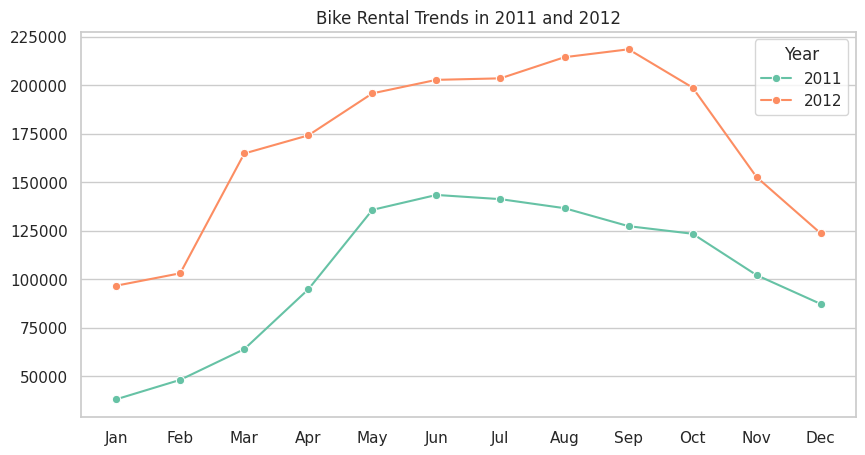

In [39]:
day_df["month"] = pd.Categorical(day_df["month"], categories=
    ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
    ordered=True)

monthly_counts = day_df.groupby(by=["year", "month"]).agg({
    "total_count": "sum"
}).reset_index()

# Set the style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(
    data = monthly_counts,
    x = "month",
    y = "total_count",
    hue = "year",
    palette = "Set2",
    marker = "o"
)
plt.xlabel(None)
plt.ylabel(None)
plt.title("Bike Rental Trends in 2011 and 2012")
plt.legend(title = "Year", loc = "upper right")
plt.gca().xaxis.grid(False)
plt.show()

### Pertanyaan 2: Bagaimana pengaruh musim terhadap penggunaan bike-sharing?

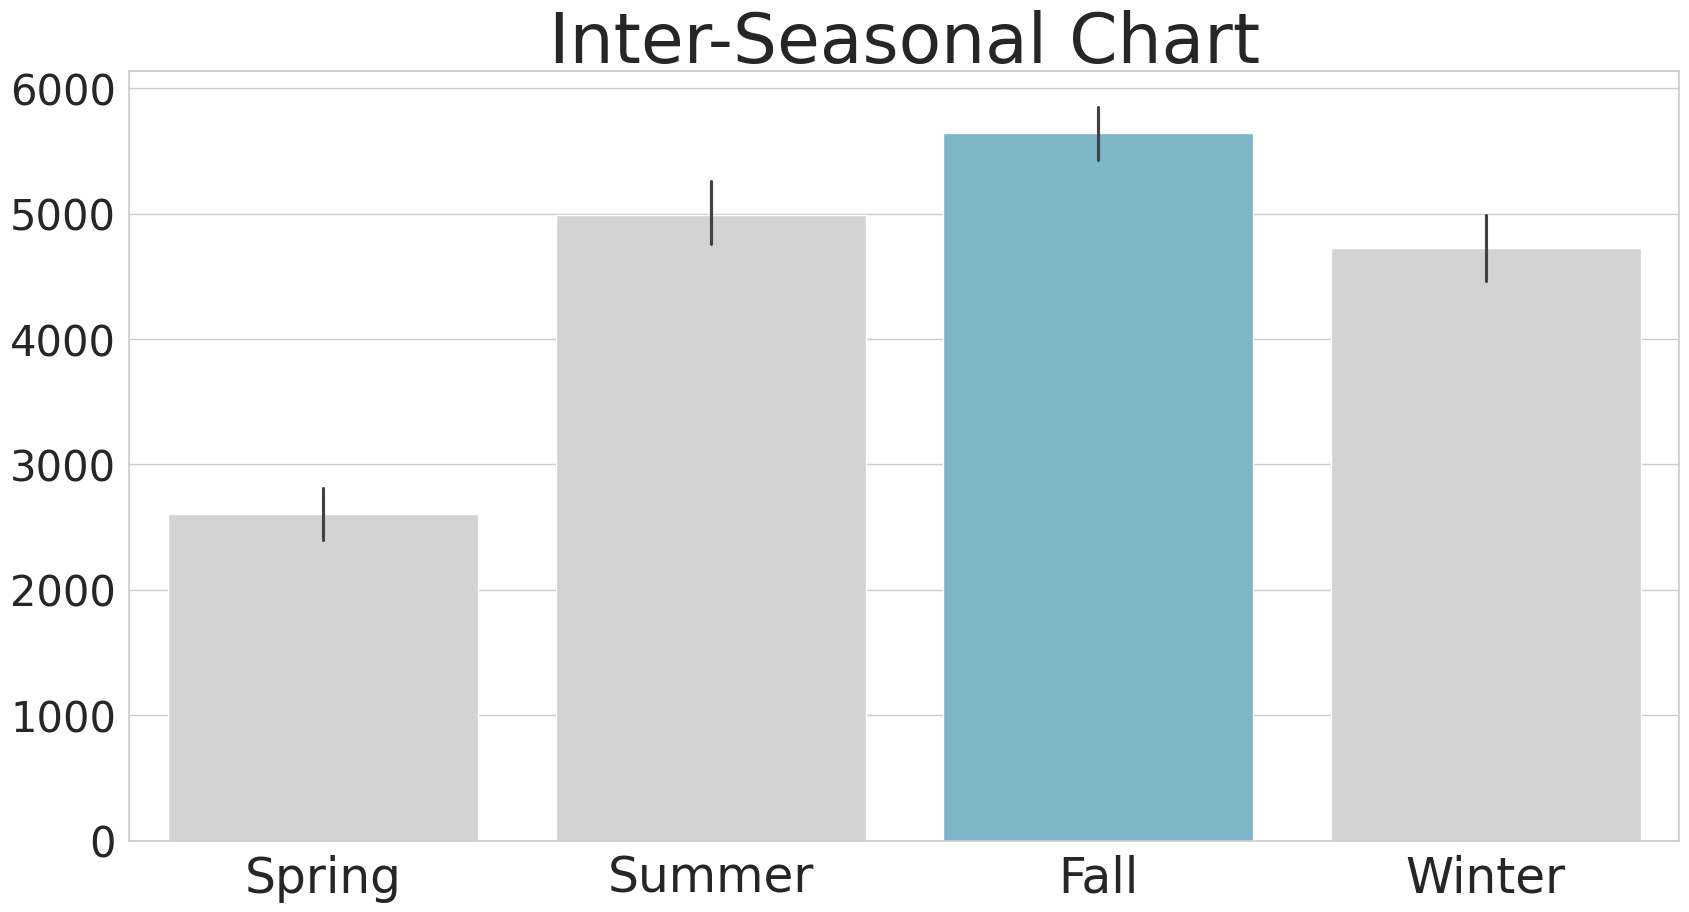

In [40]:
# colors setting
colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

# create a subplot with 1 row and 1 column, with size (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Create a barplot for y="total_count" and x="season", using data=day_df
sns.barplot(
        y="total_count",
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=colors,
        ax=ax
    )
# sets the title, y and x labels, and tick params for the subplot
ax.set_title("Inter-Seasonal Chart", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# show the plot
plt.show()

### Pertanyaan 3: Bagaimana perbandingan antara pelanggan registered dan casual?

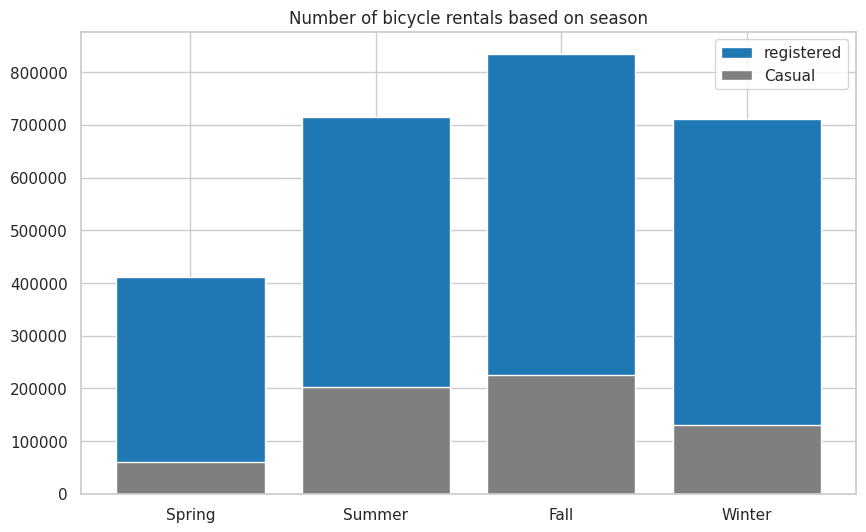

In [41]:
# Groups data by season and counts the number of registered and unregistered user
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Create bar plot
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:gray'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of bicycle rentals based on season')
plt.legend()
plt.show()


## Conclusion

- Conclution pertanyaan 1: There are differences in rental peaks and valleys between the two years. In 2011 June was the peak in rentals (in the summer) and the valley in January (in the spring). Meanwhile, in 2012 the peak was in September (in autumn) and the valley was the same, namely in January. From this visualization, it can be seen that the number of bicycles rented in different years is very significant, in 2012 overall it was higher than in 2011.

- Conclution pertanyaan 2: The influence of the season on the number of bicycles rented looks significant. From the lowest, namely spring, to the most significant increase in summer and the peak is in the fall season and decreases when winter arrives.

- Conclution pertanyaan 3: It can be seen in the graph that the comparison between registered and casual is significantly comparable to the previous graph.

hour_df.to_csv("all_data.csv", index=False)

## Apply advanced analysis techniques

### Clustering Analysis

In [42]:
day_df['weather_condition'].value_counts()

Clear/Partly Cloudy    463
Misty/Cloudy           247
Light Rain/Snow         21
Name: weather_condition, dtype: int64

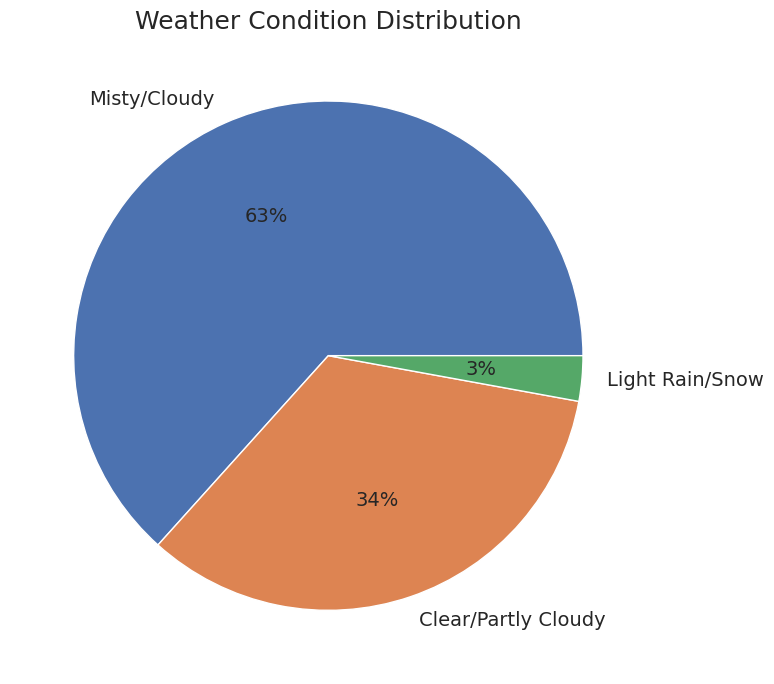

In [43]:
# Get unique weather conditions
unique_conditions = day_df['weather_condition'].unique()

# Count the occurrences of each weather condition
counts = day_df['weather_condition'].value_counts()

plt.figure(figsize=(10,7))

# Create the pie chart
plt.pie(counts, labels=unique_conditions, autopct='%1.0f%%', textprops={'fontsize': 14})

plt.title('Weather Condition Distribution', fontsize=18)
plt.tight_layout()
plt.show()


- Based on the pie chart, we can group users into 3 clusters

In [44]:
current_date = max(day_df['datetime'])
rfm_df = day_df.groupby('registered').agg({
    'datetime': lambda x: (current_date - x.max()).days,  # Recency
    'rec_id': 'count',  # Frequency
    'total_count': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'recency', 'frequency', 'monetary']

print(rfm_df.head())

   registered  recency  frequency  monetary
0          20       63          1        22
1         416      704          1       431
2         432        5          1       441
3         451      372          1       754
4         472      705          1       506


In [45]:
rfm_df.describe()

,registered,recency,frequency,monetary
count,679.000000,679.000000,679.000000,679.000000
mean,3649.804124,359.539028,1.076583,4849.306333
std,1573.666175,212.183961,0.282262,2532.379196
min,20.000000,0.000000,1.000000,22.000000
25%,2485.500000,172.500000,1.000000,3199.000000
50%,3643.000000,358.000000,1.000000,4595.000000
75%,4776.500000,542.000000,1.000000,6417.000000
max,6946.000000,730.000000,3.000000,22373.000000


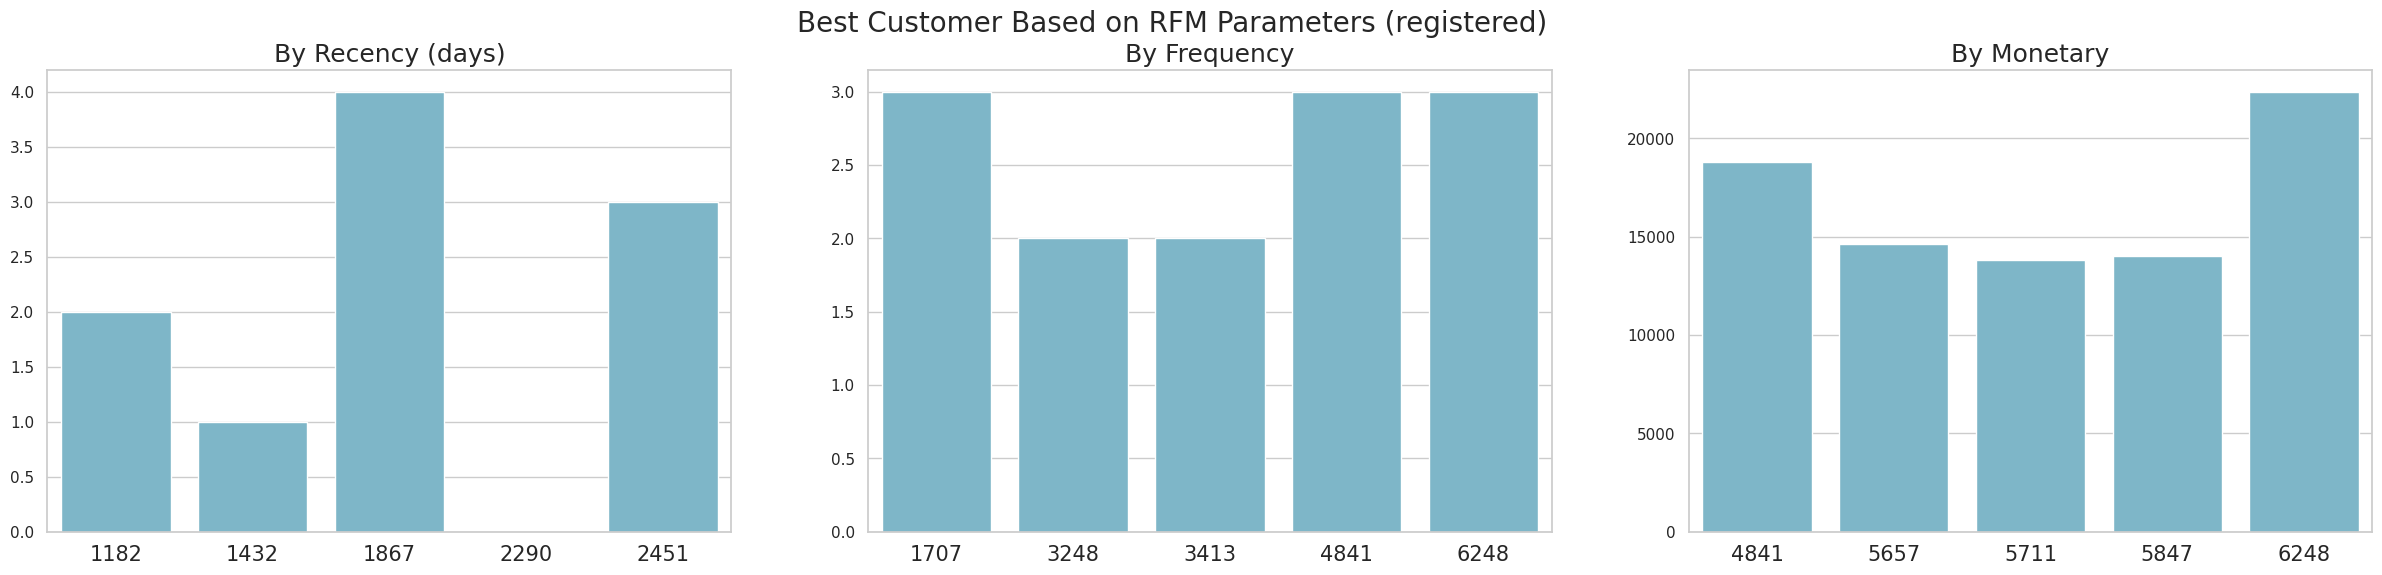

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="registered", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="registered", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="registered", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (registered)", fontsize=20)
plt.show()

## Export File

In [47]:
hour_df.to_csv("hour_data.csv", index=False)

In [48]:
day_df.to_csv("day_data.csv", index=False)